In [5]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import pandas as pd


In [2]:
sim = rebound.Simulation()

# add sun
sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .1
simtime = 1e6

starting_a = 0
starting_e = 0
final_a = 0
final_e = 0


# create astroid
mass = 1e-29
#radius = 2.495+(0.001*i)
radius = 2.4+(0.2*random.random())

# res on 2.502

#omega =((2*np.pi)/as_per_ring)*j
omega =(2*np.pi)*random.random()
#omega = 0.5*np.pi
ecc = 0.2*random.random()
#ecc = 0
    
# add sun
sim.add(m=1)
# add mars
sim.add(m=3.2271560828978514e-07, a= 1.524, omega = 0.5*np.pi)
# add jupiter
sim.add(m=0.0009547919099366768, a = 5.204, omega = 1.5*np.pi)
# add astroid
sim.add(m=mass,a=radius,omega=omega, e=ecc)

starting_a = radius
starting_e = ecc

for j in range (100):

    clear_output(wait=True)
    print(j/100)

    for i in range (int((simtime*(1/sim.dt))/100)):
        sim.step()

    
final_a = (sim.particles[3].a)
final_e = (sim.particles[3].e)



with open('sim.csv', 'a') as f1:
      
    # using csv.writer method from CSV package
    write = csv.writer(f1)
    #write.writerow(["start axis","final axis", "start ecc", "final ecc"])
    write.writerow([starting_a,final_a,starting_e,final_e])

f1.close()

# with open('final_a_list.csv', 'w') as f2:
      
#     # using csv.writer method from CSV package
#     write = csv.writer(f2)
#     write.writerow(["final_a_list"])
#     write.writerows([final_a_list])


0.99


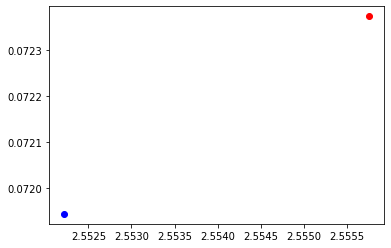

In [8]:
plt.plot([starting_a],[starting_e],"ro")
plt.plot([final_a],[final_e],"bo")
plt.show()

In [26]:
with open('sim.csv', 'r') as f:
      
    # using csv.writer method from CSV package
    #write = csv.reader(f)

    content = f.readlines()
    header = content[:1]
    rows = content[1:]
    print(rows[0])



2.5460940042769473,2.5536676500527826,0.08195108799393386,0.08576777444151505



In [14]:
#data= pd.read_csv("sim.csv")
data = pd.read_csv('sim.csv', usecols= ['start axis'])
print(data)


   start axis
0    2.546094
1    2.476190
2    2.555754
3    2.498138
4    2.502362
5    2.463175
6    2.567355
7    2.422228
8    2.453366
9    2.418256
